In [62]:
!pip install --upgrade numpy scikit-learn lightgbm





ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-sdk 3.0.8 requires scikit-learn==1.6.*, but you have scikit-learn 1.7.2 which is incompatible.
ydata-sdk 3.0.8 requires statsmodels==0.14.4, but you have statsmodels 0.14.1 which is incompatible.



     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 465.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB 653.6 kB/s eta 0:00:14
   ---------------------------------------- 0.1/8.9 MB 435.7 kB/s eta 0:00:21
   ---------------------------------------- 0.1/8.9 MB 438.9 kB/s eta 0:00:21
   ---------------------------------------- 0.1/8.9 MB 476.3 kB/s eta 0:00:19
   ---------------------------------------- 0.1/8.9 MB 420.8 kB/s eta 0:00:21
    --------------------------------------- 0.1/8.9 MB 450.6 kB/s eta 0:00:20
    --------------------------------------- 0.1/8.9 MB 448.2 kB/s eta 0:00:20
    ------

In [583]:
import sqlite3
import pandas as pd
import os
import joblib
# 1. Connect to your SQLite database
# Replace "your_database.db" with your actual .db file path
db_path = "MIG_Cement_Records.db"
conn = sqlite3.connect(db_path)

# 2. Write your SQL query
query = "SELECT * FROM sqlite_master;"

# 3. Fetch into a DataFrame
df = pd.read_sql_query(query, conn)

# 4. Display the data
print(df.head())

    type                            name     tbl_name  rootpage  \
0  table                           Sites        Sites         2   
1  index        sqlite_autoindex_Sites_1        Sites         3   
2  table                     CementTypes  CementTypes         4   
3  index  sqlite_autoindex_CementTypes_1  CementTypes         5   
4  table                      Operations   Operations         6   

                                                 sql  
0  CREATE TABLE Sites (\n    site_id TEXT PRIMARY...  
1                                               None  
2  CREATE TABLE CementTypes (\n    cement_type TE...  
3                                               None  
4  CREATE TABLE Operations (\n    date TEXT,\n   ...  


In [584]:
# for table in ["Sites", "CementTypes", "Operations"]:
#     query = f"PRAGMA table_info({table});"
#     print(f"\nColumns in {table}:")
#     print(pd.read_sql_query(query, conn))

for table in ["Sites", "CementTypes", "Operations"]:
    print(f"\nPreview of {table}:")
    print(pd.read_sql_query(f"SELECT * FROM {table} LIMIT 5;", conn))


Preview of Sites:
    site_id region  silo_capacity      behavior
0  SITE_001  North            448    aggressive
1  SITE_002  South            288  conservative
2  SITE_003   East            314    aggressive
3  SITE_004  South            472  conservative
4  SITE_005  South            230    aggressive

Preview of CementTypes:
  cement_type
0       CEM_I
1      CEM_II
2     CEM_III

Preview of Operations:
         date   site_id cement_type  planned_pour_tonnes  consumed_tonnes  \
0  2022-01-01  SITE_001      CEM_II                43.18            34.54   
1  2022-01-02  SITE_001       CEM_I                45.26            45.26   
2  2022-01-03  SITE_001     CEM_III                38.69            38.69   
3  2022-01-04  SITE_001       CEM_I                33.16            33.16   
4  2022-01-05  SITE_001     CEM_III                56.88            47.04   

   opening_inventory_tonnes  deliveries_tonnes  closing_inventory_tonnes  \
0                     52.56              45.83   

In [585]:
query = """
SELECT 
    o.date,
    o.site_id,
    s.region,
    s.behavior,
    o.cement_type,
    o.planned_pour_tonnes,
    o.consumed_tonnes,
    o.opening_inventory_tonnes,
    o.deliveries_tonnes,
    o.closing_inventory_tonnes,
    o.rain_mm,
    o.avg_temp_c,
    o.silo_capacity
FROM Operations o
JOIN Sites s ON o.site_id = s.site_id
JOIN CementTypes c ON o.cement_type = c.cement_type;
"""

df_joined = pd.read_sql_query(query, conn)
print(df_joined)  # Should now show (32880, 11) if that’s the actual data
# conn.close()



             date   site_id region    behavior cement_type  \
0      2022-01-01  SITE_001  North  aggressive      CEM_II   
1      2022-01-02  SITE_001  North  aggressive       CEM_I   
2      2022-01-03  SITE_001  North  aggressive     CEM_III   
3      2022-01-04  SITE_001  North  aggressive       CEM_I   
4      2022-01-05  SITE_001  North  aggressive     CEM_III   
...           ...       ...    ...         ...         ...   
32875  2024-12-27  SITE_030  South  aggressive     CEM_III   
32876  2024-12-28  SITE_030  South  aggressive       CEM_I   
32877  2024-12-29  SITE_030  South  aggressive     CEM_III   
32878  2024-12-30  SITE_030  South  aggressive      CEM_II   
32879  2024-12-31  SITE_030  South  aggressive       CEM_I   

       planned_pour_tonnes  consumed_tonnes  opening_inventory_tonnes  \
0                    43.18            34.54                     52.56   
1                    45.26            45.26                     63.85   
2                    38.69          

In [586]:
# Save DataFrame to CSV
df_joined.to_csv("cement_records_joined.csv", index=False)

print("Data saved to cement_records_joined.csv")

Data saved to cement_records_joined.csv


In [587]:
df = pd.read_csv("cement_records_joined.csv")
df.head()

,date,site_id,region,behavior,cement_type,planned_pour_tonnes,consumed_tonnes,opening_inventory_tonnes,deliveries_tonnes,closing_inventory_tonnes,rain_mm,avg_temp_c,silo_capacity
0,2022-01-01,SITE_001,North,aggressive,CEM_II,43.18,34.54,52.56,45.83,63.85,3.40,-3.10,448
1,2022-01-02,SITE_001,North,aggressive,CEM_I,45.26,45.26,63.85,19.97,38.56,3.23,14.28,448
2,2022-01-03,SITE_001,North,aggressive,CEM_III,38.69,38.69,38.56,47.19,47.06,2.64,6.40,448
3,2022-01-04,SITE_001,North,aggressive,CEM_I,33.16,33.16,47.06,18.74,32.64,8.25,14.23,448
4,2022-01-05,SITE_001,North,aggressive,CEM_III,56.88,47.04,32.64,14.40,0.00,2.69,8.97,448


In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32880 entries, 0 to 32879
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      32880 non-null  object 
 1   site_id                   32880 non-null  object 
 2   region                    32880 non-null  object 
 3   behavior                  32880 non-null  object 
 4   cement_type               32880 non-null  object 
 5   planned_pour_tonnes       32880 non-null  float64
 6   consumed_tonnes           32880 non-null  float64
 7   opening_inventory_tonnes  32880 non-null  float64
 8   deliveries_tonnes         32880 non-null  float64
 9   closing_inventory_tonnes  32880 non-null  float64
 10  rain_mm                   32880 non-null  float64
 11  avg_temp_c                32880 non-null  float64
 12  silo_capacity             32880 non-null  int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 3.3+ MB


In [589]:
df['date'] = pd.to_datetime(df['date'])

In [590]:
print("shape:",df.shape)
display(df.columns.tolist())
display(df.isnull().sum())

shape: (32880, 13)


['date',
 'site_id',
 'region',
 'behavior',
 'cement_type',
 'planned_pour_tonnes',
 'consumed_tonnes',
 'opening_inventory_tonnes',
 'deliveries_tonnes',
 'closing_inventory_tonnes',
 'rain_mm',
 'avg_temp_c',
 'silo_capacity']

date                        0
site_id                     0
region                      0
behavior                    0
cement_type                 0
planned_pour_tonnes         0
consumed_tonnes             0
opening_inventory_tonnes    0
deliveries_tonnes           0
closing_inventory_tonnes    0
rain_mm                     0
avg_temp_c                  0
silo_capacity               0
dtype: int64

In [591]:
numerical_col = df.select_dtypes(include=["int64",'float64']).columns
numerical_col

Index(['planned_pour_tonnes', 'consumed_tonnes', 'opening_inventory_tonnes',
       'deliveries_tonnes', 'closing_inventory_tonnes', 'rain_mm',
       'avg_temp_c', 'silo_capacity'],
      dtype='object')

In [592]:
(df[numerical_col] < 0).sum()

planned_pour_tonnes            0
consumed_tonnes                0
opening_inventory_tonnes       0
deliveries_tonnes              0
closing_inventory_tonnes       0
rain_mm                        0
avg_temp_c                  4551
silo_capacity                  0
dtype: int64

In [593]:
df['inventory_check'] = (
    df['opening_inventory_tonnes'] + df['deliveries_tonnes'] -df['consumed_tonnes']).round(2) == df['closing_inventory_tonnes'].round(2)

df['inventory_check'].mean()

0.999787104622871

In [594]:
df["stock_out"] = df["planned_pour_tonnes"] >(df['closing_inventory_tonnes'] + df['deliveries_tonnes'])

In [595]:
df['over_capacity'] = df['closing_inventory_tonnes'] > df['silo_capacity']

In [596]:
# df['idle'] = ((df['planned_pour_tonnes'] == 0 & df['deliveries_tonnes'] == 0))

df['idle'] = (df['planned_pour_tonnes'] == 0) & (df['deliveries_tonnes'] == 0)


In [597]:
df['waste_risk'] = (df['closing_inventory_tonnes'] > 0.85 * df['silo_capacity']) & (df['planned_pour_tonnes'] < 5)


In [598]:
df['pour_disrupted'] = (df['planned_pour_tonnes'] > 0) & (df['consumed_tonnes'] == 0)

In [599]:
kpi_summary = df.groupby('site_id').agg(
    total_days =("date",'count'),
    total_consumed_tonnes =('consumed_tonnes','sum'),
    avg_daily_consumed = ('consumed_tonnes','mean'),
    stockout_pct = ('stock_out',lambda x : round(x.mean()*100,2)),
    overcapacity = ('over_capacity',lambda x : round(x.mean()*100,2)),
    idle_pct = ('idle',lambda x : round(x.mean()*100,2)),
    waste_risk_pct = ('waste_risk',lambda x : round(x.mean()*100,2)),
    pour_disrupted_pct = ('pour_disrupted',lambda x : round(x.mean()*100,2)),
    silo_capacity = ('silo_capacity','first'),
    region = ('region','first')
).reset_index()



kpi_summary.head()

,site_id,total_days,total_consumed_tonnes,avg_daily_consumed,stockout_pct,overcapacity,idle_pct,waste_risk_pct,pour_disrupted_pct,silo_capacity,region
0,SITE_001,1096,33056.40,30.160949,59.95,0.00,0.0,0.00,4.84,448,North
1,SITE_002,1096,12900.44,11.770474,0.00,98.81,0.0,3.56,0.00,288,South
2,SITE_003,1096,32520.09,29.671615,59.03,0.00,0.0,0.00,5.75,314,East
3,SITE_004,1096,12618.50,11.513230,0.00,98.08,0.0,4.93,0.00,472,South
4,SITE_005,1096,32935.68,30.050803,61.86,0.00,0.0,0.00,4.38,230,South


Top 5 Sites by Avg Daily Consumption:
     site_id  avg_daily_consumed region
24  SITE_025           30.660639  South
9   SITE_010           30.638467   West
17  SITE_018           30.427089   East
0   SITE_001           30.160949  North
20  SITE_021           30.118321   East


TypeError: 'str' object is not callable

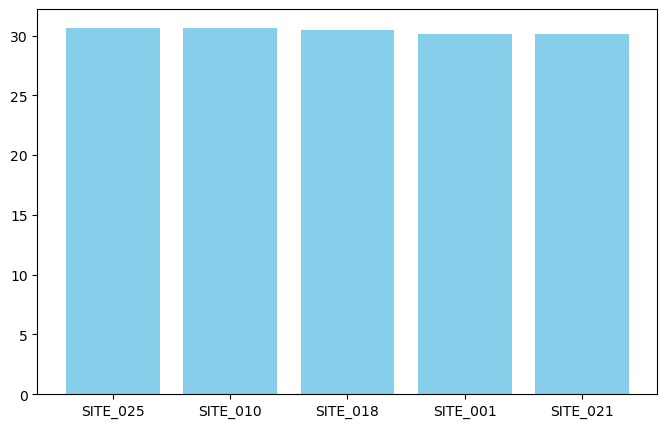

In [600]:
# Top 5 Sites by Average Daily Consumption

top5_consumption = kpi_summary.sort_values(
    by="avg_daily_consumed", ascending=False
).head(5)

print("Top 5 Sites by Avg Daily Consumption:")
print(top5_consumption[["site_id", "avg_daily_consumed", "region"]])


import matplotlib.pyplot as plt

top5_consumption = kpi_summary.nlargest(5, "avg_daily_consumed")

plt.figure(figsize=(8,5))
plt.bar(top5_consumption["site_id"], top5_consumption["avg_daily_consumed"], color="skyblue")
plt.title("Top 5 Sites by Avg Daily Consumption")
plt.xlabel("Site ID")
plt.ylabel("Avg Daily Consumption (tonnes)")
plt.xticks(rotation=45)
plt.show()

In [601]:
# Worst 5 Sites by Stockout %

worst5_stockout = kpi_summary.sort_values(
    by="stockout_pct", ascending=False
).head(5)

print("Worst 5 Sites by Stockout %:")
print(worst5_stockout[["site_id", "stockout_pct", "region"]])




Worst 5 Sites by Stockout %:
     site_id  stockout_pct region
10  SITE_011         65.51  South
21  SITE_022         63.87  South
20  SITE_021         63.69   East
7   SITE_008         63.59   West
19  SITE_020         63.41  South


Top 5 Sites by Total Consumption:
     site_id  total_consumed_tonnes region
24  SITE_025               33604.06  South
9   SITE_010               33579.76   West
17  SITE_018               33348.09   East
0   SITE_001               33056.40  North
20  SITE_021               33009.68   East


TypeError: 'str' object is not callable

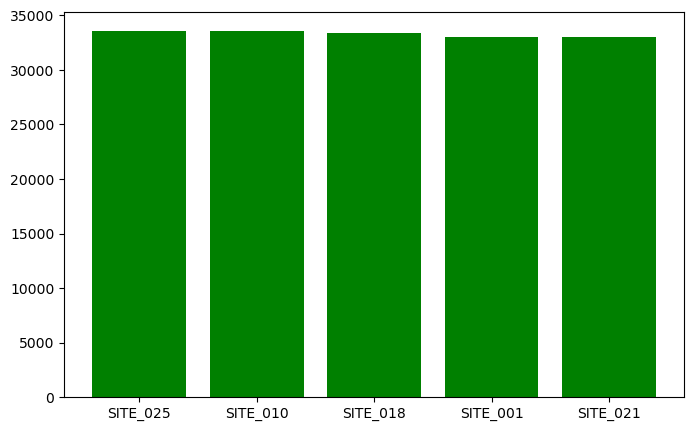

In [602]:
# Sites with Highest Pour Disruption

top5_total1 = kpi_summary.nlargest(5, "total_consumed_tonnes")
print("Top 5 Sites by Total Consumption:")
print(top5_total1[["site_id", "total_consumed_tonnes", "region"]])


top5_total = kpi_summary.nlargest(15, "total_consumed_tonnes")

plt.figure(figsize=(8,5))
plt.bar(top5_total1["site_id"], top5_total1["total_consumed_tonnes"], color="green")
plt.title("Top 5 Sites by Highest pour Distrption")
plt.xlabel("Site ID")
plt.ylabel("Total Consumed (tonnes)")
plt.xticks(rotation=45)
plt.show()



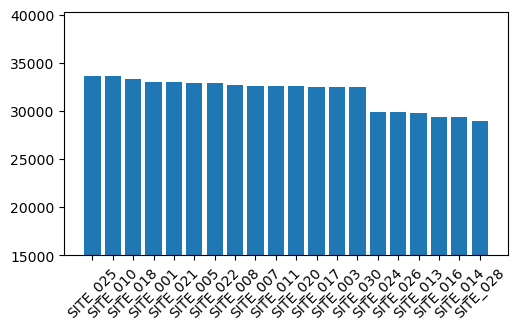

In [603]:

top_site =kpi_summary.sort_values('total_consumed_tonnes', ascending = False).head(20)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
plt.bar(top_site['site_id'],top_site['total_consumed_tonnes'])
plt.title =("Top 20 sited by total cement consumption")
plt.xticks(rotation=45)
plt.ylim(15000, top_site['total_consumed_tonnes'].max() *1.2)
plt.tight_layout()
plt.show()

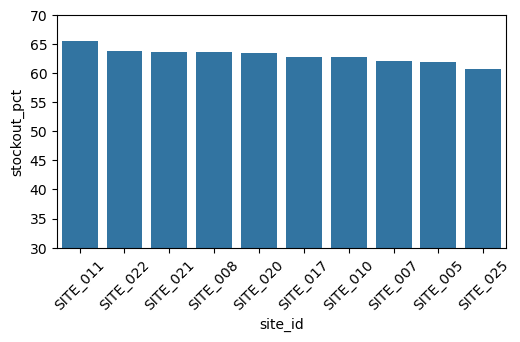

In [604]:
import  seaborn as sns

risk_site =kpi_summary.sort_values('stockout_pct', ascending = False).head(10)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
sns.barplot(x ='site_id',y='stockout_pct',data = risk_site)
plt.title =("Top 10 sited by stockout Risk %")
plt.xticks(rotation=45)
plt.ylim(30,70)
# plt.ylim(15000, top_site['total_consumed_tonnes'].max() *1.2)
plt.tight_layout()
plt.show()

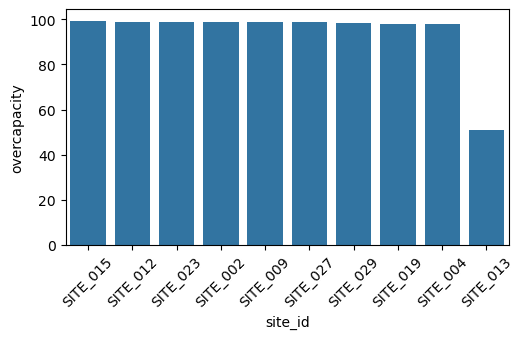

In [605]:

overcapacity_site =kpi_summary.sort_values('overcapacity', ascending = False).head(10)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
sns.barplot(x ='site_id',y='overcapacity',data = overcapacity_site)
plt.title =("Top 10 sited by overcapacity_pct %")
plt.xticks(rotation=45)
# plt.ylim(10,60)
# plt.ylim(15000, top_site['total_consumed_tonnes'].max() *1.2)
plt.tight_layout()
plt.show()

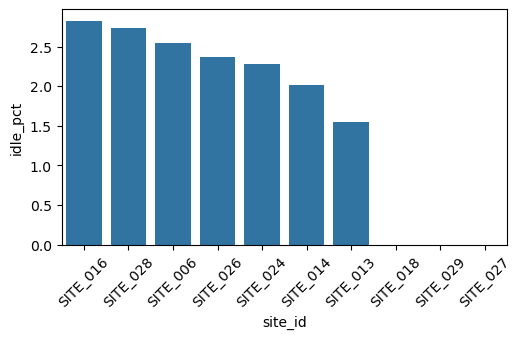

In [606]:
idle_site =kpi_summary.sort_values('idle_pct', ascending = False).head(10)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
sns.barplot(x ='site_id',y='idle_pct',data = idle_site)
plt.title =("Top 10 sited by IDLE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

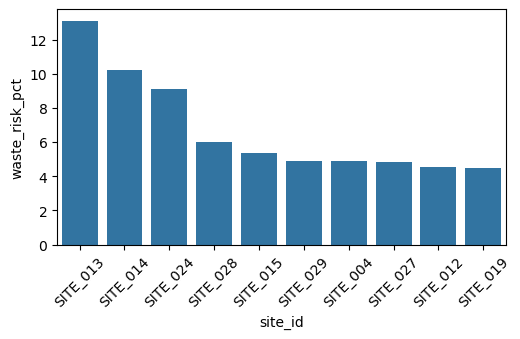

In [607]:
waste_site =kpi_summary.sort_values('waste_risk_pct', ascending = False).head(10)
plt.figure(figsize=(15,6))
plt.subplot(2,3,2)
sns.barplot(x ='site_id',y='waste_risk_pct',data = waste_site)
plt.title=("Top 10 sited by Waste Risk %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [608]:
df['utilization+pct'] = df['closing_inventory_tonnes'] / df['silo_capacity']

In [609]:
utilization_summary = df.groupby('site_id')['utilization+pct'].mean().sort_values(ascending=False)

<Axes: title={'center': 'average silo utilization by site'}, xlabel='site_id'>

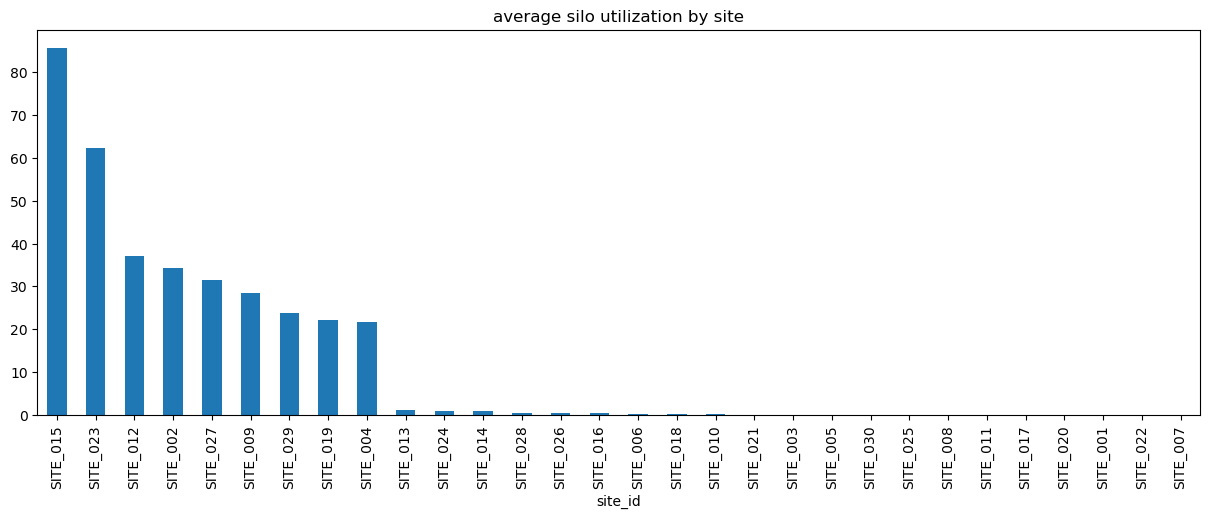

In [610]:
utilization_summary.plot(kind = 'bar' , title='average silo utilization by site',figsize=(15,5))

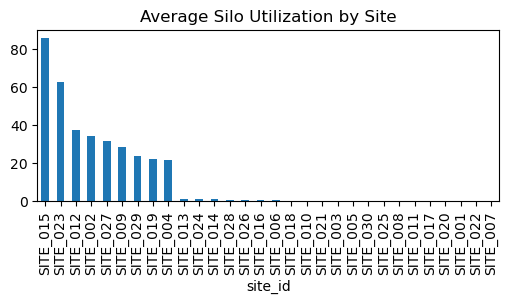

In [611]:
plt.figure(figsize=(15,5))

# Create subplot slot (2 rows, 3 columns, position 2)
ax = plt.subplot(2,3,2)

# Plot on that axis
utilization_summary.plot(
    kind="bar",
    x="site_id",
    y="avg_silo_utilization",   # change to your column
    title="Average Silo Utilization by Site",
    ax=ax
)

plt.tight_layout()
plt.show()


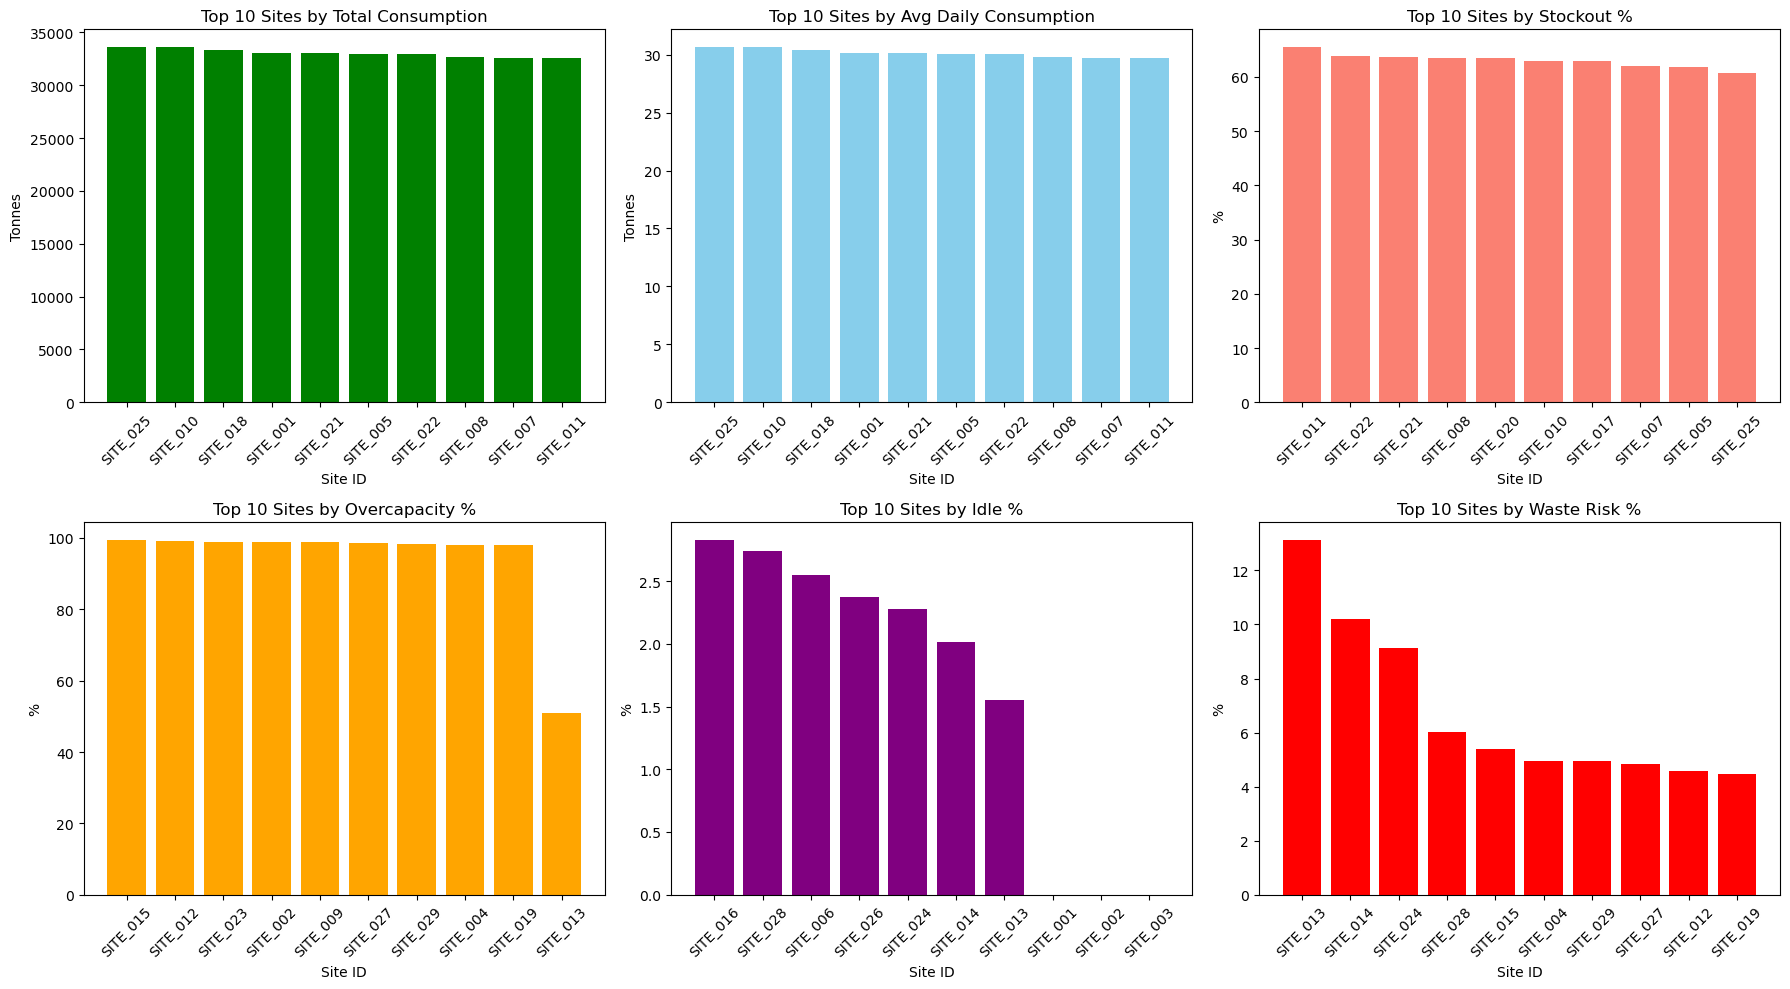

In [612]:
import matplotlib.pyplot as plt

# Select top 10 sites for each KPI
top10_consumed = kpi_summary.nlargest(10, "total_consumed_tonnes")
top10_avg = kpi_summary.nlargest(10, "avg_daily_consumed")
top10_stockout = kpi_summary.nlargest(10, "stockout_pct")
top10_overcap = kpi_summary.nlargest(10, "overcapacity")
top10_idle = kpi_summary.nlargest(10, "idle_pct")
top10_waste = kpi_summary.nlargest(10, "waste_risk_pct")

# Create dashboard grid (2 rows x 3 cols)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# --- Plot 1: Total Consumption ---
axes[0,0].bar(top10_consumed["site_id"], top10_consumed["total_consumed_tonnes"], color="green")
axes[0,0].set_title("Top 10 Sites by Total Consumption")
axes[0,0].set_xlabel("Site ID")
axes[0,0].set_ylabel("Tonnes")
axes[0,0].tick_params(axis="x", rotation=45)

# --- Plot 2: Avg Daily Consumption ---
axes[0,1].bar(top10_avg["site_id"], top10_avg["avg_daily_consumed"], color="skyblue")
axes[0,1].set_title("Top 10 Sites by Avg Daily Consumption")
axes[0,1].set_xlabel("Site ID")
axes[0,1].set_ylabel("Tonnes")
axes[0,1].tick_params(axis="x", rotation=45)

# --- Plot 3: Stockout % ---
axes[0,2].bar(top10_stockout["site_id"], top10_stockout["stockout_pct"], color="salmon")
axes[0,2].set_title("Top 10 Sites by Stockout %")
axes[0,2].set_xlabel("Site ID")
axes[0,2].set_ylabel("%")
axes[0,2].tick_params(axis="x", rotation=45)

# --- Plot 4: Overcapacity % ---
axes[1,0].bar(top10_overcap["site_id"], top10_overcap["overcapacity"], color="orange")
axes[1,0].set_title("Top 10 Sites by Overcapacity %")
axes[1,0].set_xlabel("Site ID")
axes[1,0].set_ylabel("%")
axes[1,0].tick_params(axis="x", rotation=45)

# --- Plot 5: Idle % ---
axes[1,1].bar(top10_idle["site_id"], top10_idle["idle_pct"], color="purple")
axes[1,1].set_title("Top 10 Sites by Idle %")
axes[1,1].set_xlabel("Site ID")
axes[1,1].set_ylabel("%")
axes[1,1].tick_params(axis="x", rotation=45)

# --- Plot 6: Waste Risk % ---
axes[1,2].bar(top10_waste["site_id"], top10_waste["waste_risk_pct"], color="red")
axes[1,2].set_title("Top 10 Sites by Waste Risk %")
axes[1,2].set_xlabel("Site ID")
axes[1,2].set_ylabel("%")
axes[1,2].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


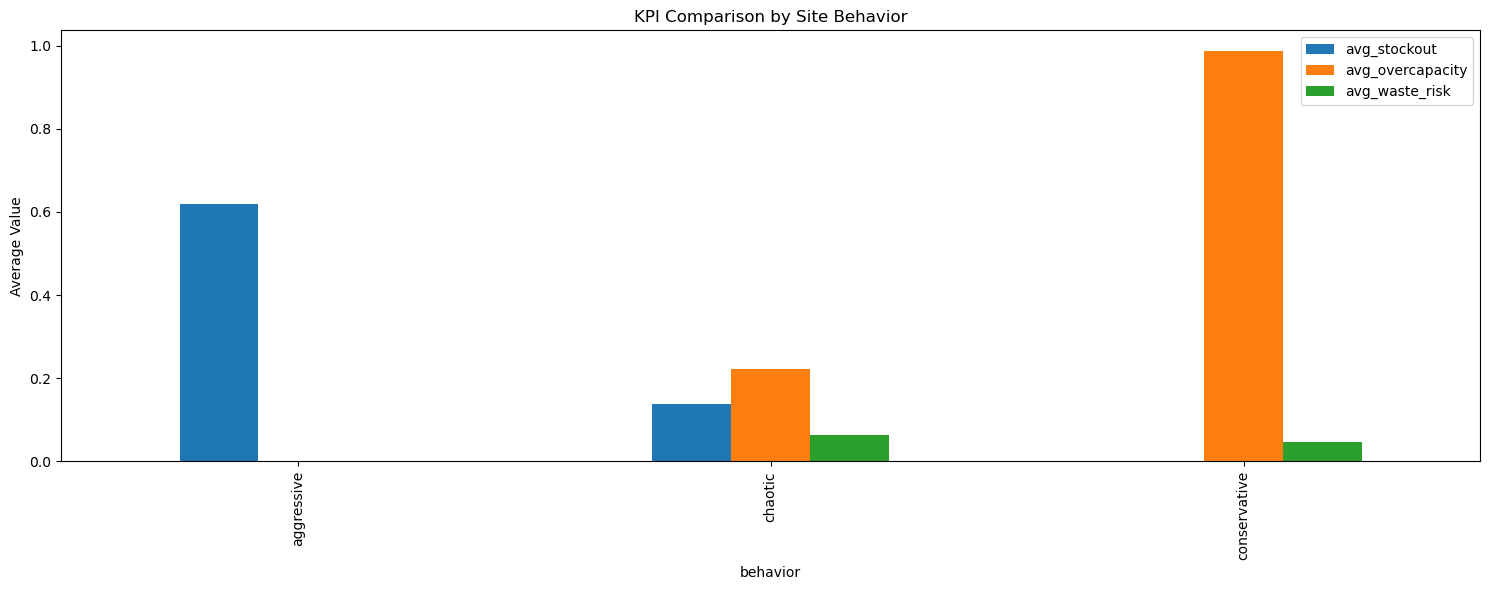

In [613]:
behavior_kpi = df.groupby('behavior').agg(
    avg_stockout=('stock_out', 'mean'),
    avg_overcapacity=('over_capacity', 'mean'),
    avg_waste_risk=('waste_risk', 'mean')
)
# behavior_kpi.plot(kind='bar',figsize(15,6),title='kpi Comparison by site behavious')

behavior_kpi.plot(
    kind='bar',
    figsize=(15,6),
    title='KPI Comparison by Site Behavior'
)

plt.xticks(rotation=90)
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()




In [614]:
#kpi comparison by site Behavior
#Comparison key performace indicator across different site Behavior to identify trends

site_usage = df.groupby('site_id')['consumed_tonnes'].sum().sort_values(ascending=False)

total_usage = site_usage.sum()
top5=site_usage.head(5)
top5_share = round(top5.sum() / total_usage * 100,2)

display(top5)
display(top5_share)

site_id
SITE_025    33604.06
SITE_010    33579.76
SITE_018    33348.09
SITE_001    33056.40
SITE_021    33009.68
Name: consumed_tonnes, dtype: float64

21.36

In [615]:
# Group by site and take mean of selected columns
site_usage = df.groupby('site_id')[['closing_inventory_tonnes', 'planned_pour_tonnes']].mean()

# Sort by closing inventory (you can also sort by 'stockout_pct' if you prefer)
site_usage = site_usage.sort_values('closing_inventory_tonnes', ascending=False)

# Total usage for closing inventory
total_usage = site_usage['closing_inventory_tonnes'].sum()

# Top 5 sites
top5 = site_usage.head(10)

# Percentage share of top 5 sites
top5_share = round(top5['closing_inventory_tonnes'].sum() / total_usage * 100, 2)

display(top5)
display(top5_share)


,closing_inventory_tonnes,planned_pour_tonnes
site_id,,
SITE_029,10387.101907,11.829407
SITE_019,10305.583349,11.835867
SITE_015,10282.268139,11.495876
SITE_004,10255.298248,11.874872
SITE_012,10170.920301,11.681277
SITE_009,10016.697108,12.030849
SITE_027,9875.467108,11.833896
SITE_002,9873.164489,12.131223
SITE_023,9551.627801,12.182664


98.7

<Axes: title={'center': 'Cement Type Demand Share'}, ylabel='consumed_tonnes'>

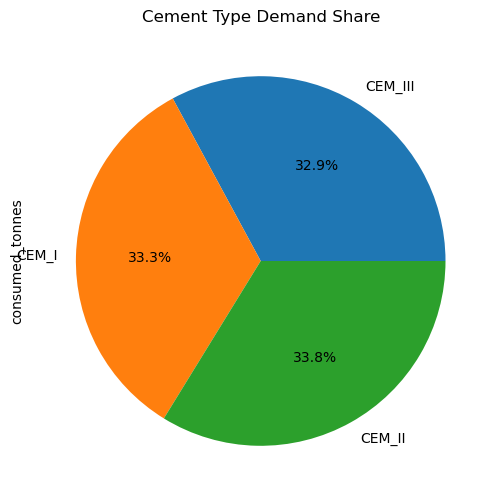

In [616]:
#cement Type Demand share
#Understanding which cement types most consumed to optimize inventory chain.
cement_demand =df.groupby('cement_type')["consumed_tonnes"].sum().sort_values()
cement_demand.plot(kind='pie',autopct='%1.1f%%',figsize=(6,6),title='Cement Type Demand Share')

<Axes: title={'center': 'Monthly cemnet Demand Seasonality'}, xlabel='month'>

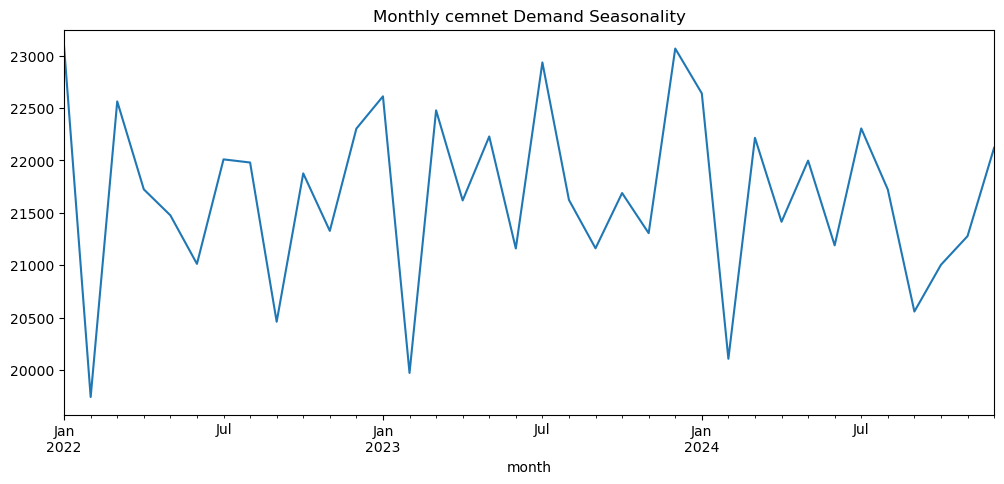

In [617]:
#Monthly Cement Demand Seasionality
#Identifying seasonal treds in cement comparison to better plan logistic abd inventory.
df["month"] = df['date'].dt.to_period("M")
monthly_demand = df.groupby('month')['consumed_tonnes'].sum()
monthly_demand.plot(figsize=(12,5),title='Monthly cemnet Demand Seasonality')

MODELIMG

In [618]:
import warnings
warnings.filterwarnings("ignore")

In [619]:
site_id = 'SITE_001'
site_df = df[df['site_id'] == site_id].copy()
site_df.set_index('date',inplace=True)
site_df = site_df.sort_index()

In [620]:
print(site_df.columns)

Index(['site_id', 'region', 'behavior', 'cement_type', 'planned_pour_tonnes',
       'consumed_tonnes', 'opening_inventory_tonnes', 'deliveries_tonnes',
       'closing_inventory_tonnes', 'rain_mm', 'avg_temp_c', 'silo_capacity',
       'inventory_check', 'stock_out', 'over_capacity', 'idle', 'waste_risk',
       'pour_disrupted', 'utilization+pct', 'month'],
      dtype='object')


In [621]:
# y = site_df['consumed_tonnes']

# X= site_df[['planned_pour_tonnes', 'rain_mm', 'avg_temp_c']]

# # Train-test split first
# # split_index = int(len(site_df) * 0.8)
# # y_train, y_test = X.iloc[:split_index], X.iloc[split_index:]
# # y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
# X_test,y_test,X_train,y_train(X,y,test_size = 0.2, random_state =42)
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

from sklearn.model_selection import train_test_split

X = site_df[['planned_pour_tonnes', 'rain_mm', 'avg_temp_c']]
y = site_df['consumed_tonnes']  # or your target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(876, 3) (876,)
(220, 3) (220,)


In [622]:
from statsmodels.tsa.ar_model import AutoReg

# Train-test split first
split_index = int(len(site_df) * 0.8)
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Fit AutoReg (only y, no exog allowed here)
model = AutoReg(y_train, lags=12)
results = model.fit()

print(results.summary())

# Forecast same length as y_test
# ar_forecast = results.predict(
#     start=y_test.index[0], 
#     end=y_test.index[-1]
# )

ar_forecast = results.predict(
    start=y_test.index[0], 
    end=y_test.index[-1]
)

# Align forecast index with y_test
ar_forecast = pd.Series(ar_forecast, index=y_test.index)


                            AutoReg Model Results                             
Dep. Variable:        consumed_tonnes   No. Observations:                  876
Model:                    AutoReg(12)   Log Likelihood               -3538.428
Method:               Conditional MLE   S.D. of innovations             14.534
Date:                Thu, 18 Sep 2025   AIC                           7104.855
Time:                        21:47:12   BIC                           7171.517
Sample:                    01-13-2022   HQIC                          7130.370
                         - 05-25-2024                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  43.4557      4.414      9.846      0.000      34.805      52.106
consumed_tonnes.L1     -0.0021      0.034     -0.061      0.951      -0.069       0.065
consumed_tonnes.

In [623]:
ar_forecast

date
2024-05-26    28.531087
2024-05-27    30.962267
2024-05-28    30.012847
2024-05-29    31.439491
2024-05-30    30.499731
                ...    
2024-12-27    30.526993
2024-12-28    30.526993
2024-12-29    30.526993
2024-12-30    30.526993
2024-12-31    30.526993
Length: 220, dtype: float64

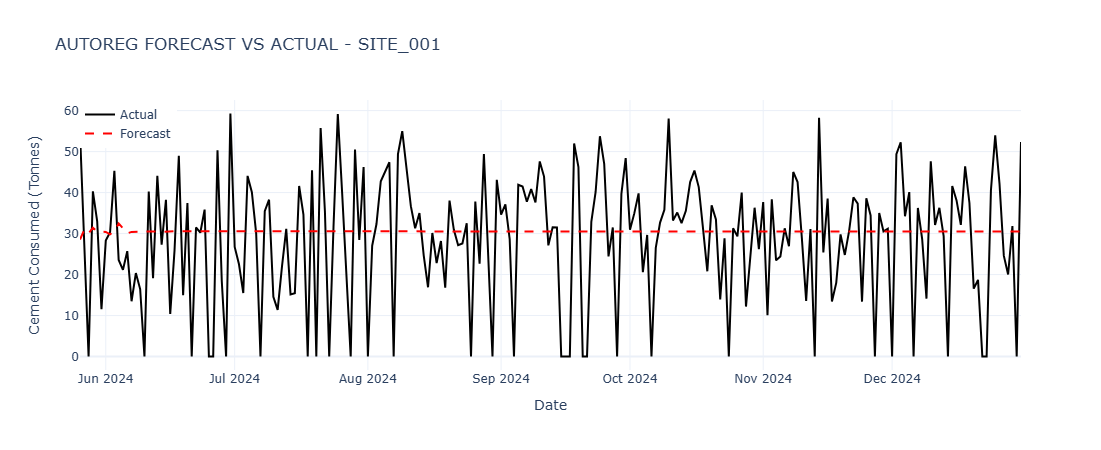

In [624]:
import plotly.express as px
import plotly.graph_objects as go

import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Actual values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name="Actual",
    line=dict(color='black')
))

# Forecasted values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=ar_forecast,
    mode='lines',
    name="Forecast",
    line=dict(color='red', dash='dash')
))

# Layout customization
fig.update_layout(
    title=f'AUTOREG FORECAST VS ACTUAL - {site_id}',
    xaxis_title="Date",
    yaxis_title="Cement Consumed (Tonnes)",
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,
    height=450
)

fig.show()


In [625]:
# Train-test split
split_index = int(len(site_df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(876, 3) (876,)
(220, 3) (220,)


In [626]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 3
[LightGBM] [Info] Start training from score 30.567180


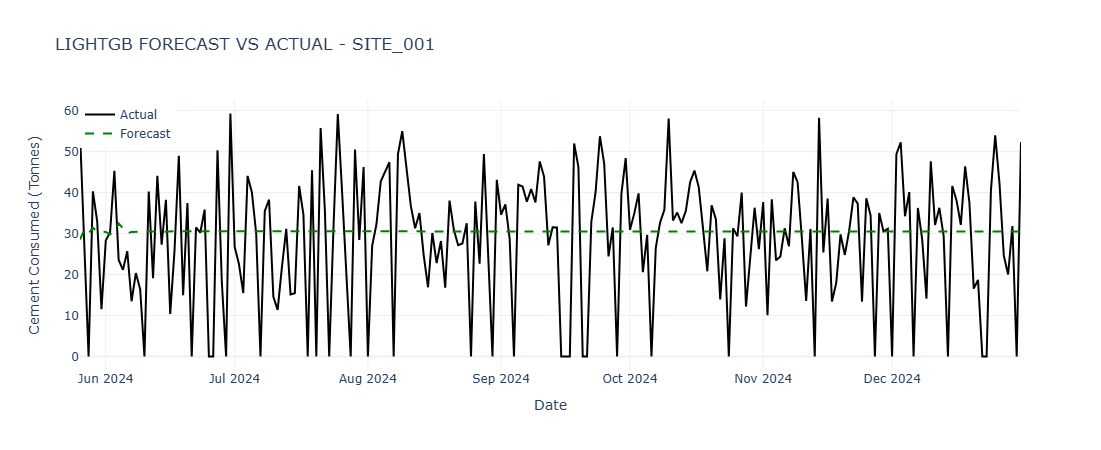

In [627]:
#visualisation SARIMAX Forecast Vs actual
fig = go.Figure()

# Actual Values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name="Actual",
    line=dict(color='black')
))

# Forecast Values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=ar_forecast,
    mode='lines',
    name='Forecast',
    line=dict(color='green', dash='dash')
))

# Layout
fig.update_layout(
    title=f'LIGHTGB FORECAST VS ACTUAL - {site_id}',
    xaxis_title="Date",
    yaxis_title="Cement Consumed (Tonnes)",
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,
    height=450
)

fig.show()

In [628]:
# Evaluation Metrics
import numpy as np
from sklearn.metrics import mean_squared_error

def print_metrics(y_true, y_pred, label):
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{label} - MAPE: {mape:.2f}%, RMSE: {rmse:.2f} tonnes")


# Comparing SARIMAX and Random Forest
print_metrics(y_test,ar_forecast, "AUTOREG")
print_metrics(y_test, y_pred, "LIGHTGB Forest")

AUTOREG - MAPE: 32.99%, RMSE: 15.81 tonnes
LIGHTGB Forest - MAPE: 35.35%, RMSE: 10.82 tonnes


In [629]:

# --- Feature Engineering ---

# Filter for one site
site_df = df[df['site_id'] == 'SITE_001'].copy().sort_values('date')
site_df.set_index('date', inplace=True)

# Lag features
site_df["lag_1"] = site_df['consumed_tonnes'].shift(1)
site_df["lag_3"] = site_df['consumed_tonnes'].shift(3)
site_df["lag_7"] = site_df['consumed_tonnes'].shift(7)

# Rolling statistics
site_df['rolling_mean_3'] = site_df['consumed_tonnes'].rolling(3).mean()
site_df['rolling_std_7'] = site_df['consumed_tonnes'].rolling(7).std()

# Date-based features
site_df['day_of_week'] = site_df.index.dayofweek
site_df['week_of_year'] = site_df.index.isocalendar().week.astype(int)

# Interaction features
site_df['rain_x_pour'] = site_df['rain_mm'] * site_df['planned_pour_tonnes']
site_df['temp_x_pour'] = site_df['avg_temp_c'] * site_df['planned_pour_tonnes']

# Inventory features
site_df['inventory_gap'] = (
    site_df['opening_inventory_tonnes'] + site_df['deliveries_tonnes'] - site_df['planned_pour_tonnes']
)
site_df['inventory_ratio'] = site_df['closing_inventory_tonnes'] / site_df['silo_capacity']

# Encoding categorical variables
site_df['behavior_encoded'] = site_df['behavior'].astype('category').cat.codes
site_df['cement_type_encoded'] = site_df['cement_type'].astype('category').cat.codes

# Drop NaNs from lag/rolling features
site_df.dropna(inplace=True)

# --- Define features and target ---
features = [
    "planned_pour_tonnes", "rain_mm", "avg_temp_c",
    "lag_1", "lag_3", "lag_7",
    "rolling_mean_3", "rolling_std_7",
    "rain_x_pour", "temp_x_pour",
    "inventory_gap", "inventory_ratio",
    "behavior_encoded", "cement_type_encoded",  # fixed duplicate
    "day_of_week", "week_of_year"
]

X = site_df[features]
y = site_df["consumed_tonnes"]

# --- Train-test split (time series) ---
split_index = int(len(site_df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- Train model ---
model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb =model.fit(X_train, y_train)

# Predict
y_pred = lgb.predict(X_test)

# --- Evaluate ---
def print_metrics(y_true, y_pred, label):
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{label} - MAPE: {mape:.2f}%, RMSE: {rmse:.2f} tonnes")

print_metrics(y_test, y_pred, "LightGBM (Enhanced Features)")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3016
[LightGBM] [Info] Number of data points in the train set: 871, number of used features: 15
[LightGBM] [Info] Start training from score 30.545614
LightGBM (Enhanced Features) - MAPE: 3.39%, RMSE: 1.18 tonnes


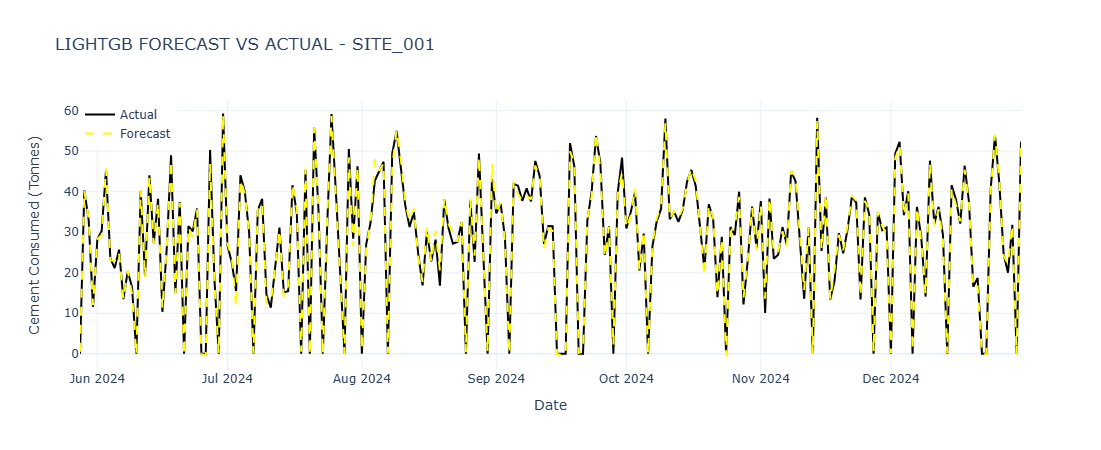

In [630]:
#visualisation Random Forest Forecast Vs actual
import plotly.graph_objects as go


fig = go.Figure()

# Actual Values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='lines',
    name="Actual",
    line=dict(color='black')
))

# Forecast Values
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_pred,
    mode='lines',
    name='Forecast',
    line=dict(color='yellow',dash='dash')
))

# Layout
fig.update_layout(
    title=f'LIGHTGB FORECAST VS ACTUAL - {site_id}',
    xaxis_title="Date",
    yaxis_title="Cement Consumed (Tonnes)",
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,
    height=450
)

fig.show()

In [631]:
# import feature in the dataset

# feat_important = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# print(feat_important.head(10))

# For LightGBM
feat_important = pd.Series(
    model.feature_importances_, 
    index=model.feature_name_
).sort_values(ascending=False)

print(feat_important.head(10))

planned_pour_tonnes    719
inventory_gap          622
avg_temp_c             232
temp_x_pour            207
lag_3                  173
rolling_mean_3         164
rolling_std_7          159
rain_mm                147
lag_1                  146
week_of_year           112
dtype: int32


In [632]:
import matplotlib.pyplot as plt

# Get feature importances
feat_important = pd.Series(
    model.feature_importances_,
    index=model.feature_name_
).sort_values(ascending=False)

# Print top features
print("Top 10 features:\n", feat_important.head(10))



Top 10 features:
 planned_pour_tonnes    719
inventory_gap          622
avg_temp_c             232
temp_x_pour            207
lag_3                  173
rolling_mean_3         164
rolling_std_7          159
rain_mm                147
lag_1                  146
week_of_year           112
dtype: int32


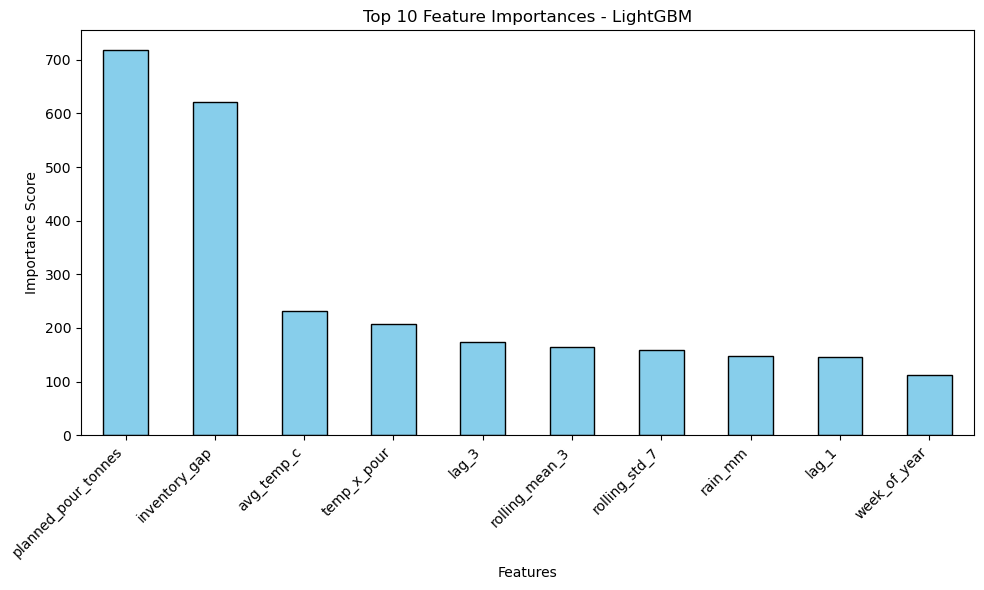

In [633]:
# Plot
fig, ax = plt.subplots(figsize=(10,6))
feat_important.head(10).plot(
    kind='bar', color='skyblue', edgecolor='black', ax=ax
)
ax.set_title("Top 10 Feature Importances - LightGBM")
ax.set_ylabel("Importance Score")
ax.set_xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

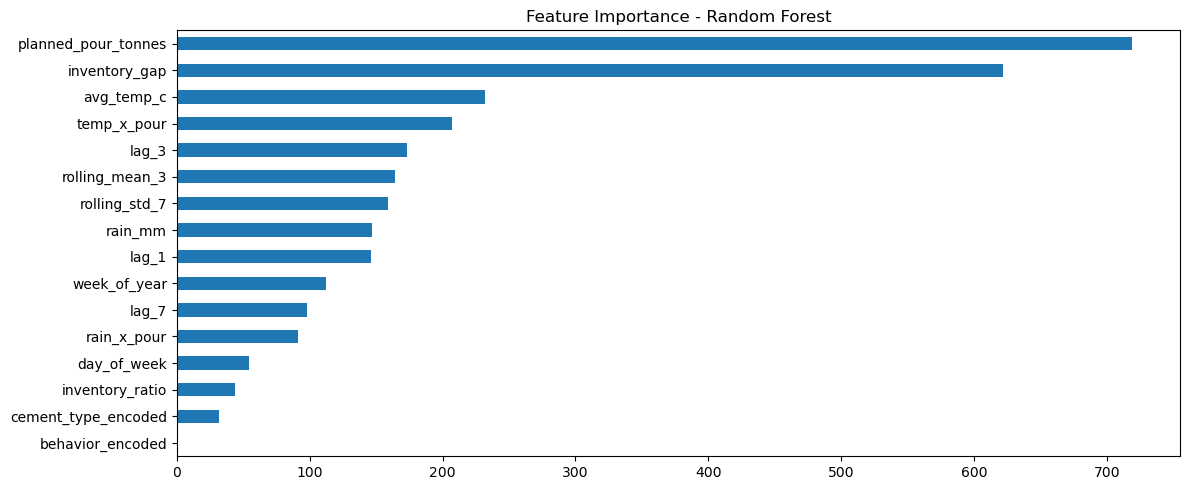

In [634]:
# feature important visualisation

# Feature importance
importance = pd.Series(lgb.feature_importances_, index=features).sort_values()

# Plot
importance.plot(kind='barh', figsize=(12,5), title='Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [635]:
lgb.score(X_train,y_train)

0.9992102772105617

In [636]:

# Parameters
silo_capacity = 1000
initial_inventory = 600
lead_time_days = 3
reorder_threshold = 0.2 * silo_capacity
target_inventory = 0.8 * silo_capacity
buffer_rain_threshold = 10   # mm rainfall threshold
buffer_increase = 0.1

# DataFrame to store result
df_sim = pd.DataFrame({
    "date": X_test.index,
    "forecasted_consumption": y_pred,
    "rain_forecast_mm": X_test["rain_mm"].values
})



In [637]:
df_sim.isnull().sum()

date                      0
forecasted_consumption    0
rain_forecast_mm          0
dtype: int64

In [638]:
# df_sim["sim_inventory"] = np.nan
# df_sim['reoder_flag'] = False
# df_sim['recommended_delivery_quantity'] = 0.0
# df_sim['buffer_applied'] = False




# Initialize columns
df_sim["sim_inventory"] = 0.0
df_sim["reorder_flag"] = False
df_sim["buffer_applied"] = False
df_sim["recommended_delivery_date"] = pd.NaT
df_sim["recommended_delivery_quantity"] = 0.0



In [639]:


# Initialize inventory
inventory = initial_inventory
delivery_queue = {}

# Simulation loop
for i, row in df_sim.iterrows():
    today = row["date"]

    # If a delivery is due, add it to inventory
    if today in delivery_queue:
        inventory += delivery_queue[today]
        inventory = min(inventory, silo_capacity)
        del delivery_queue[today]

    # Subtract today's consumption
    consumption = row["forecasted_consumption"]
    inventory -= consumption

    # Record today's inventory
    df_sim.loc[i, "sim_inventory"] = inventory

    # Check reorder condition
    if inventory < reorder_threshold:
        df_sim.loc[i, "reorder_flag"] = True
        delivery_date = today + pd.Timedelta(days=lead_time_days)

        # Calculate delivery qty
        delivery_qty = target_inventory - inventory
        if row["rain_forecast_mm"] > buffer_rain_threshold:
            delivery_qty *= (1 + buffer_increase)
            df_sim.loc[i, "buffer_applied"] = True

        # Cap by silo capacity
        delivery_qty = min(delivery_qty, silo_capacity - inventory)
        delivery_queue[delivery_date] = delivery_qty

        # Save delivery details
        df_sim.loc[i, "recommended_delivery_date"] = delivery_date.strftime("%Y-%m-%d")
        df_sim.loc[i, "recommended_delivery_quantity"] = round(delivery_qty, 2)


In [640]:
# KPIs
stockouts = (df_sim["sim_inventory"] < 0).sum()
service_level = 100 * (1 - stockouts / len(df_sim))
avg_inventory = df_sim["sim_inventory"].mean()
num_deliveries = df_sim["reorder_flag"].sum()

print(f"Service level: {service_level:.2f}%")
print(f"Stockouts: {stockouts}")
print(f"Average inventory: {avg_inventory:.2f} tonnes")
print(f"Number of deliveries: {num_deliveries}")

# Output
output_df = df_sim[
    ["date", "forecasted_consumption", "sim_inventory", "reorder_flag",
     "recommended_delivery_date", "recommended_delivery_quantity", "buffer_applied"]
]

output_df.head(50)

                      

Service level: 100.00%
Stockouts: 0
Average inventory: 552.44 tonnes
Number of deliveries: 21


,date,forecasted_consumption,sim_inventory,reorder_flag,recommended_delivery_date,recommended_delivery_quantity,buffer_applied
0,2024-05-28,0.507510,599.492490,False,NaT,0.00,False
1,2024-05-29,40.320758,559.171732,False,NaT,0.00,False
2,2024-05-30,33.313110,525.858621,False,NaT,0.00,False
3,2024-05-31,12.005502,513.853119,False,NaT,0.00,False
4,2024-06-01,28.337480,485.515639,False,NaT,0.00,False
5,2024-06-02,29.316536,456.199103,False,NaT,0.00,False
6,2024-06-03,45.722451,410.476652,False,NaT,0.00,False
7,2024-06-04,23.049729,387.426923,False,NaT,0.00,False
8,2024-06-05,22.929064,364.497859,False,NaT,0.00,False
9,2024-06-06,24.950317,339.547542,False,NaT,0.00,False


In [641]:
# import numpy as np
# import pandas as pd
# from lightgbm import LGBMRegressor
# from sklearn.metrics import mean_squared_error


# ---------------- Feature Engineering ----------------
def engineer_features(df, site_id):
    # Ensure datetime
    df['date'] = pd.to_datetime(df['date'])

    # Filter by site
    site_df = df[df['site_id'] == site_id].copy().sort_values('date')
    site_df.set_index('date', inplace=True)

    # Lag features
    site_df["lag_1"] = site_df['consumed_tonnes'].shift(1)
    site_df["lag_3"] = site_df['consumed_tonnes'].shift(3)
    site_df["lag_7"] = site_df['consumed_tonnes'].shift(7)
    
    # Rolling statistics
    site_df['rolling_mean_3'] = site_df['consumed_tonnes'].rolling(3).mean()
    site_df['rolling_std_7'] = site_df['consumed_tonnes'].rolling(7).std()

    # Date-based features
    site_df['day_of_week'] = site_df.index.dayofweek
    site_df['week_of_year'] = site_df.index.isocalendar().week.astype(int)

    # Interaction features
    site_df['rain_x_pour'] = site_df['rain_mm'] * site_df['planned_pour_tonnes']
    site_df['temp_x_pour'] = site_df['avg_temp_c'] * site_df['planned_pour_tonnes']

    # Inventory features
    site_df['inventory_gap'] = (
        site_df['opening_inventory_tonnes'] + site_df['deliveries_tonnes'] - site_df['planned_pour_tonnes']
    )
    site_df['inventory_ratio'] = site_df['closing_inventory_tonnes'] / site_df['silo_capacity']

    # Encoding categorical variables
    site_df['behavior_encoded'] = site_df['behavior'].astype('category').cat.codes
    site_df['cement_type_encoded'] = site_df['cement_type'].astype('category').cat.codes

    # Drop NaNs from lag/rolling features
    site_df.dropna(inplace=True)

    return site_df


# ---------------- Model Training ----------------
def train_rf_forecast(site_df):
    # Features
    features = [
        "planned_pour_tonnes", "rain_mm", "avg_temp_c",
        "lag_1", "lag_3", "lag_7",
        "rolling_mean_3", "rolling_std_7",
        "rain_x_pour", "temp_x_pour",
        "inventory_gap", "inventory_ratio",
        "behavior_encoded", "cement_type_encoded",
        "day_of_week", "week_of_year"
    ]

    X = site_df[features]
    y = site_df["consumed_tonnes"]

    # Train-test split (time series)
    # split_index = int(len(X) * 0.8)
    # X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    # y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    X_train, X_test,y_train, y_test=train_test_split(X,y, test_size =0.2,random_state = 42)

    # Train model
    model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    return model, X_test, y_test, y_pred


model, X_test, y_test, y_pred = train_rf_forecast(site_df)
print_metrics(y_test, y_pred, "LightGBM (Enhanced Features)")





[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3024
[LightGBM] [Info] Number of data points in the train set: 871, number of used features: 15
[LightGBM] [Info] Start training from score 29.900907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM (Enhanced Features) - MAPE: 3.18%, RMSE: 1.21 tonnes


In [642]:
def simulate_inventory(
    df_sim,
    initial_inventory,
    silo_capacity,
    reorder_threshold,
    target_inventory,
    lead_time_days=2,
    buffer_rain_threshold=10,
    buffer_increase=0.1
):


    # Add new columns
    df_sim = df_sim.copy()
    df_sim["sim_inventory"] = np.nan
    df_sim["reorder_flag"] = False
    df_sim["buffer_applied"] = False
    df_sim["recommended_delivery_date"] = None
    df_sim["recommended_delivery_quantity"] = 0.0

    # Simulation loop
    for i, row in df_sim.iterrows():
        today = row["date"]

        # If a delivery is due today, add it
        if today in delivery_queue:
            inventory += delivery_queue[today]
            inventory = min(inventory, silo_capacity)  # cap
            del delivery_queue[today]

        # Subtract today's consumption
        consumption = row["forecasted_consumption"]
        inventory -= consumption

        # Record today's inventory
        df_sim.at[i, "sim_inventory"] = inventory

        # Check reorder condition
        if inventory < reorder_threshold:
            df_sim.at[i, "reorder_flag"] = True
            delivery_date = today + pd.Timedelta(days=lead_time_days)

            # Calculate delivery qty
            delivery_qty = target_inventory - inventory
            if row["rain_forecast_mm"] > buffer_rain_threshold:
                delivery_qty *= (1 + buffer_increase)
                df_sim.at[i, "buffer_applied"] = True

            # Cap delivery by silo capacity
            delivery_qty = min(delivery_qty, silo_capacity - inventory)

            # Schedule delivery
            delivery_queue[delivery_date] = delivery_qty

            # Save delivery details
            df_sim.at[i, "recommended_delivery_date"] = delivery_date.strftime("%Y-%m-%d")
            df_sim.at[i, "recommended_delivery_quantity"] = round(delivery_qty, 2)

    return df_sim


In [643]:


def run_pipeline(df, site_metadata, lead_time_days=2, metadata_file="pipeline_metadata.json"):
    all_metadata = {}

    for site_id, config in site_metadata.items():
        # 1. Feature engineering
        site_df = engineer_features(df, site_id)
        if site_df.empty:
            continue

        # 2. Train & forecast
        model, results = train_rf_forecast(site_df)

        # 3. Metrics
        metrics = compute_metrics(results["actual_consumption"], results["forecasted_consumption"])

        # 4. Simulate inventory
        sim_results = simulate_inventory(
            results,
            initial_inventory=config["initial_inventory"],
            silo_capacity=config["silo_capacity"],
            reorder_threshold=config["reorder_threshold"],
            target_inventory=config["target_inventory"],
            lead_time_days=lead_time_days
        )

        # 5. Collect metadata
        all_metadata[site_id] = {
            "timestamp": str(datetime.datetime.now()),
            "model_params": model.get_params(),
            "metrics": metrics,
            "inventory_settings": config
        }

    # Save all site metadata
    with open(metadata_file, "w") as f:
        json.dump(all_metadata, f, indent=4)

    print(f"✅ Metadata saved for {len(all_metadata)} sites to {metadata_file}")
    return all_metadata



In [644]:
df['site_id'].unique()

array(['SITE_001', 'SITE_002', 'SITE_003', 'SITE_004', 'SITE_005',
       'SITE_006', 'SITE_007', 'SITE_008', 'SITE_009', 'SITE_010',
       'SITE_011', 'SITE_012', 'SITE_013', 'SITE_014', 'SITE_015',
       'SITE_016', 'SITE_017', 'SITE_018', 'SITE_019', 'SITE_020',
       'SITE_021', 'SITE_022', 'SITE_023', 'SITE_024', 'SITE_025',
       'SITE_026', 'SITE_027', 'SITE_028', 'SITE_029', 'SITE_030'],
      dtype=object)

In [645]:
# ---------------- Metadata Generator ----------------
def generate_site_metadata():
    site_metadata = {}

    site_configs = [
        (1200, 674, 240, 960), (2500, 1421, 500, 2000), (1000, 592, 200, 800),
        (1500, 899, 300, 1200), (1200, 640, 240, 960), (1800, 1070, 360, 1440),
        (2000, 1198, 400, 1600), (1000, 612, 200, 800), (1500, 891, 300, 1200),
        (2200, 1387, 440, 1760), (1200, 701, 240, 960), (1000, 603, 200, 800),
        (1800, 1084, 360, 1440), (1500, 902, 300, 1200), (2000, 1235, 400, 1600),
        (1200, 689, 240, 960), (2500, 1453, 500, 2000), (1500, 874, 300, 1200),
        (1800, 1102, 360, 1440), (1000, 583, 200, 800), (2200, 1364, 440, 1760),
        (1200, 651, 240, 960), (1500, 900, 300, 1200), (1800, 1111, 360, 1440),
        (2000, 1180, 400, 1600), (1000, 594, 200, 800), (1200, 662, 240, 960),
        (1500, 917, 300, 1200), (1800, 1095, 360, 1440), (2000, 1210, 400, 1600)
    ]

    for i, (capacity, inventory, threshold, target) in enumerate(site_configs, start=1):
        site_id = f"SITE_{i:03d}"
        site_metadata[site_id] = {
            "silo_capacity": capacity,
            "initial_inventory": inventory,
            "reorder_threshold": threshold,
            "target_inventory": target
        }

    return site_metadata


# ---------------- Main ----------------
if __name__ == "__main__":
    metadata = generate_site_metadata()
    for site, data in metadata.items():
        print(f"{site}: {data}")

       
        
   

SITE_001: {'silo_capacity': 1200, 'initial_inventory': 674, 'reorder_threshold': 240, 'target_inventory': 960}
SITE_002: {'silo_capacity': 2500, 'initial_inventory': 1421, 'reorder_threshold': 500, 'target_inventory': 2000}
SITE_003: {'silo_capacity': 1000, 'initial_inventory': 592, 'reorder_threshold': 200, 'target_inventory': 800}
SITE_004: {'silo_capacity': 1500, 'initial_inventory': 899, 'reorder_threshold': 300, 'target_inventory': 1200}
SITE_005: {'silo_capacity': 1200, 'initial_inventory': 640, 'reorder_threshold': 240, 'target_inventory': 960}
SITE_006: {'silo_capacity': 1800, 'initial_inventory': 1070, 'reorder_threshold': 360, 'target_inventory': 1440}
SITE_007: {'silo_capacity': 2000, 'initial_inventory': 1198, 'reorder_threshold': 400, 'target_inventory': 1600}
SITE_008: {'silo_capacity': 1000, 'initial_inventory': 612, 'reorder_threshold': 200, 'target_inventory': 800}
SITE_009: {'silo_capacity': 1500, 'initial_inventory': 891, 'reorder_threshold': 300, 'target_inventory':

In [646]:
# Calculate MAPE for each site in the pipeline


performance_summary = []

for site_id in df['site_id'].unique():
    print(f"Evaluating model for {site_id}...")
    
    # Prepare site data
    site_df = engineer_features(df, site_id)
    
    if len(site_df) < 50:
        print(f"Skipping {site_id}, not enough data")
        continue
        
    # Get features and target
    features = [
        'planned_pour_tonnes', 'rain_mm', 'avg_temp_c',
        'lag_1', 'lag_3', 'lag_7',
        'rolling_mean_3', 'rolling_std_7',
        'rain_x_pour', 'temp_x_pour',
        'inventory_gap', 'inventory_ratio',
        'behavior_encoded', 'cement_type_encoded'
    ]
    X = site_df[features]
    y = site_df['consumed_tonnes']


    X_train, X_test,y_train, y_test=train_test_split(X,y, test_size =0.2,random_state = 42)

    # Train model
    model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # return model, X_test, y_test, y_pred



    
    # Calculate metrics - handling zero values properly
    mask = y_test != 0  # Avoid division by zero
    if mask.sum() > 0:  # Ensure we have non-zero values to evaluate
        mape = mean_absolute_percentage_error(y_test[mask], y_pred[mask]) * 100
    else:
        mape = 0  # If all test values are zero, prediction is perfect
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    performance_summary.append({
        'site_id': site_id,
        'test_samples': len(y_test),
        'non_zero_samples': mask.sum(),
        'mape': mape,
        'rmse': rmse,
        'avg_consumption': y_test.mean()
    })

# Create performance dataframe
performance_df = pd.DataFrame(performance_summary)

# Display overall performance
print("\n" + "="*60)
print("OVERALL MODEL PERFORMANCE SUMMARY")
print("="*90)
print(f"Average MAPE across all sites: {performance_df['mape'].mean():.2f}%")
print(f"Median MAPE across all sites: {performance_df['mape'].median():.2f}%")
print(f"Sites achieving MAPE ≤ 15%: {(performance_df['mape'] <= 15).sum()}/{len(performance_df)}")
print(f"Sites with MAPE > 15%: {(performance_df['mape'] > 15).sum()}/{len(performance_df)}")

# Display detailed performance table
print("\nDetailed Performance by Site:")
print(performance_df.sort_values('mape').to_string(index=False))

# Identify sites that need attention
problem_sites = performance_df[performance_df['mape'] > 15]
if not problem_sites.empty:
    print("\n" + "!"*60)
    print("SITES NEEDING ATTENTION (MAPE > 15%):")
    print("!"*60)
    print(problem_sites[['site_id', 'mape', 'avg_consumption', 'test_samples']].to_string(index=False))
else:
    print("\n🎉 ALL SITES ACHIEVED TARGET MAPE OF 15% OR BETTER! 🎉")

Evaluating model for SITE_001...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2964
[LightGBM] [Info] Number of data points in the train set: 871, number of used features: 13
[LightGBM] [Info] Start training from score 29.900907
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Evaluating model for SITE_002...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3062
[LightGBM] [Info] Number of data points in the train set: 871, number of used features: 13
[LightGBM] [Info] Start training from score 11.741848
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Evaluating model for SITE_003...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhea

In [647]:
performance_df = pd.DataFrame(performance_summary)

In [648]:
performance_df.head(30)

,site_id,test_samples,non_zero_samples,mape,rmse,avg_consumption
0,SITE_001,218,197,3.187248,1.198831,31.001055
1,SITE_002,218,210,0.921530,0.220119,11.795183
2,SITE_003,218,197,2.827183,1.357709,30.659817
3,SITE_004,218,209,1.190904,0.336573,11.758486
4,SITE_005,218,198,3.857988,1.510388,29.772018
5,SITE_006,218,166,3.686347,2.153374,28.969495
6,SITE_007,218,195,3.716460,1.230433,28.566239
7,SITE_008,218,195,3.409326,1.101304,28.609404
8,SITE_009,218,203,1.039921,0.185968,11.221147
9,SITE_010,218,200,2.887131,1.003940,31.196055
